# Exploring Wine Dataset using Clustering Techniques and Fitting Models

# Importing Libraries:

In [179]:
# Importing and loading necessary packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from tabulate import tabulate

# Loading the Dataset:

In [180]:
# Importing and reading data file
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis:

In [181]:
# Viewing data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Here, we can see that there are 178 entries with 13 features, or columns. Furthermore, all columns have numerical data types, i.e. float64 or int64.

In [182]:
# Checking for any null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Fortunately, no null values were found. While this dataset is already pretty clean, we will be preprocessing the data later on in order to prepare it for clustering.

In [183]:
print("Descriptive Statistics:\n")
data.describe()

Descriptive Statistics:



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Statistical Analysis:

In [184]:
def calculate_statistical_moments(data):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data (DataFrame): Input data containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data (DataFrame): Input data containing features.
    """
    moments_df = calculate_statistical_moments(data)
    table_description = "Table 1: Statistical Moments of Wine Dataset Features\n"
    print(table_description)
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(data)


Table 1: Statistical Moments of Wine Dataset Features

+----------------------+----------+----------+----------------------+------------+------------+
|                      |   Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+======================+==========+==========+======================+============+============+
|       Alcohol        | 13.0006  |  13.05   |       0.811827       | -0.0514823 |  -0.8525   |
+----------------------+----------+----------+----------------------+------------+------------+
|      Malic_Acid      | 2.33635  |  1.865   |       1.11715        |  1.03965   |  0.299207  |
+----------------------+----------+----------+----------------------+------------+------------+
|         Ash          | 2.36652  |   2.36   |       0.274344       | -0.176699  |  1.14398   |
+----------------------+----------+----------+----------------------+------------+------------+
|     Ash_Alcanity     | 19.4949  |   19.5   |       3.33956        |  0.213047  

In [185]:
# Checking the skew of the data
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

## Histograms:

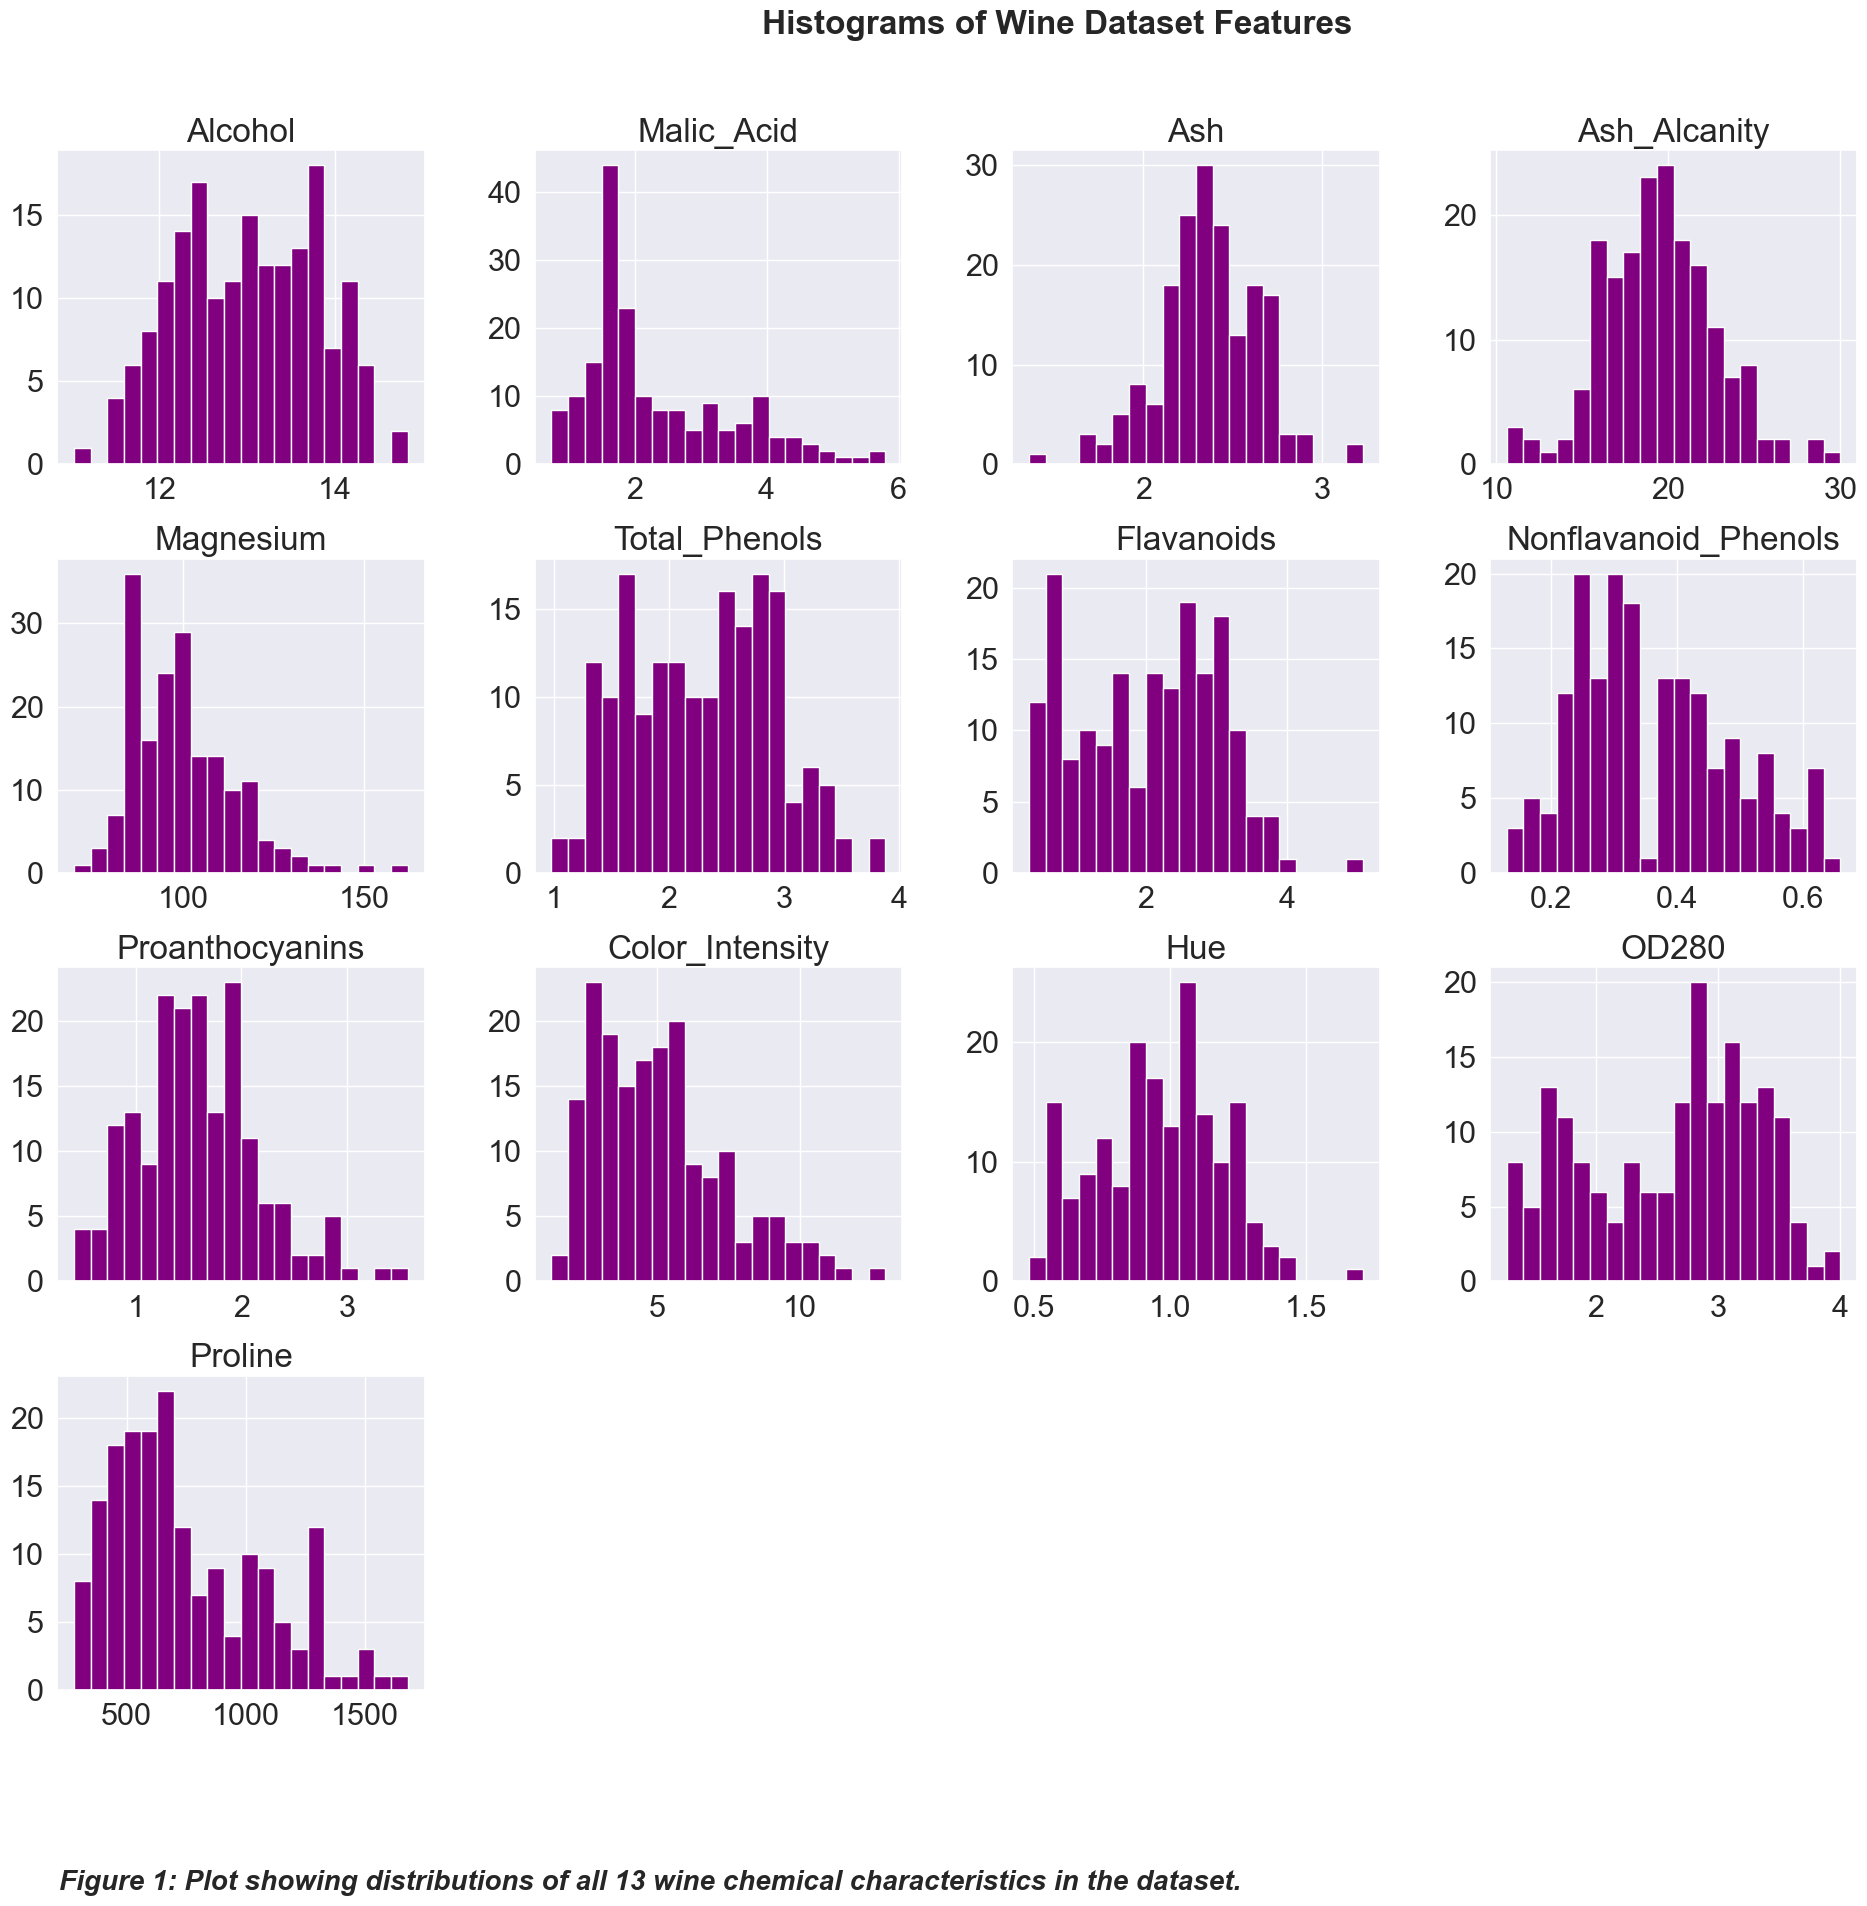

In [186]:
def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    sns.set(style='darkgrid', font_scale=2, rc={'figure.figsize':(20,20)})
    ax = data.hist(bins=20, color='purple')
    
    # Set labels font properties
    plt.xlabel('Value', fontsize=16, fontweight='bold')
    plt.ylabel('Frequency', fontsize=16, fontweight='bold')
    
    # Set tick parameters
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    
    # Adding title
    plt.suptitle('Histograms of Wine Dataset Features', fontsize=24, fontweight='bold', y=0.95)
    
    # Add description
    plt.figtext(0.001, 0.01,
                'Figure 1: Plot showing distributions of all 13 wine chemical characteristics in the dataset.',
                wrap=True, horizontalalignment='left', fontsize=20, fontweight='bold', fontstyle = 'italic')
   
    # Adjust plot to shift to left side
    plt.subplots_adjust(left=0.0)
    
    plt.show()

# Example usage
plot_histograms(data)


## Heatmap:

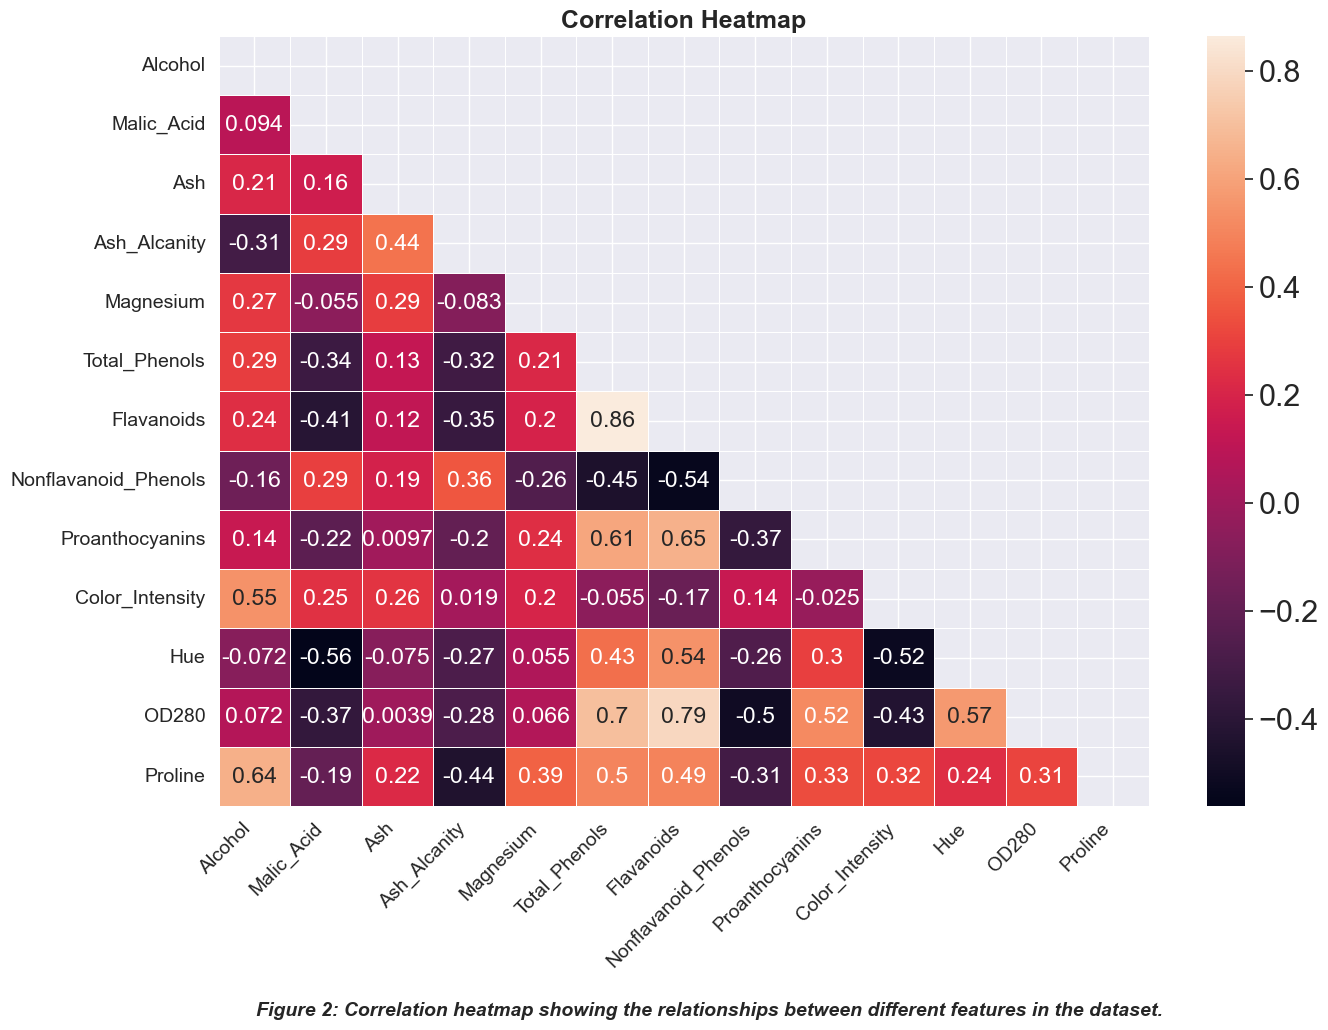

In [187]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap.

    Parameters:
    - data (DataFrame): Input data
    """
    plt.figure(figsize=(15, 10))
    # Remove duplicate data by setting mask to True
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    heatmap = sns.heatmap(data.corr(), annot=True, annot_kws={'size': 'x-small'}, linewidths=0.5, mask=mask)
    plt.title("Correlation Heatmap", fontsize=18, fontweight='bold')
    
    # Add description
    plt.figtext(0.15, -0.1,
                'Figure 2: Correlation heatmap showing the relationships between different features in the dataset.',
                wrap=True, horizontalalignment='left', fontsize=14, fontweight='bold', fontstyle = 'italic')
    
    # Tick size
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    # Tilt the ticks for both axes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right')
    
    plt.show()

# Example usage
plot_correlation_heatmap(data)


## Scatter Plot:

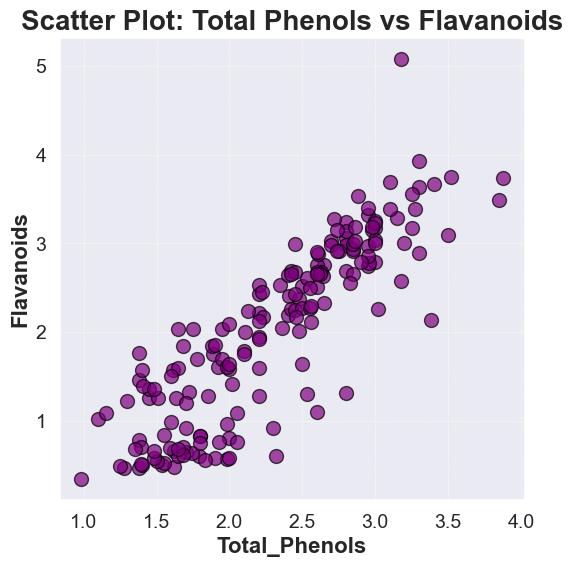

In [188]:
def scatter_plot(data, x_col, y_col, title):
    """
    Plot a scatter plot.

    Parameters:
    - data (DataFrame): Input data
    - x_col (str): Column name for x-axis
    - y_col (str): Column name for y-axis
    - title (str): Title of the plot
    """
    # Plot styling
    plt.figure(figsize=(6, 6))
    plt.scatter(data[x_col], data[y_col], color='purple', edgecolors='black', alpha=0.7, s=100)
    plt.title(title, fontsize=20, fontweight='bold')  
    plt.xlabel(x_col, fontsize=16, fontweight='bold')  
    plt.ylabel(y_col, fontsize=16, fontweight='bold')  
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=14)  
    plt.show()

scatter_plot(data, 'Total_Phenols', 'Flavanoids', 'Scatter Plot: Total Phenols vs Flavanoids')


# Data Preprocessing:

In [189]:
# Applying StandardScaler()
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

By applying StandardScaler(), we can preprocess the data to prepare it for PCA and K-Means



## Principal Component Analysis:

In [190]:
# Applying PCA, n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', data_scaled.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.41%


Here, we use Principal Component Analysis (PCA) to reduce the dimensionality of the data. While we may lose some variance but using PCA will assist in creating better visualisations. Above, you can see that by applying PCA, the structure of the dataset is now 178 rows and 2 columns (principal components). Furthermore, we can see that using just 2 principal components captures 55.41% of the total variance.

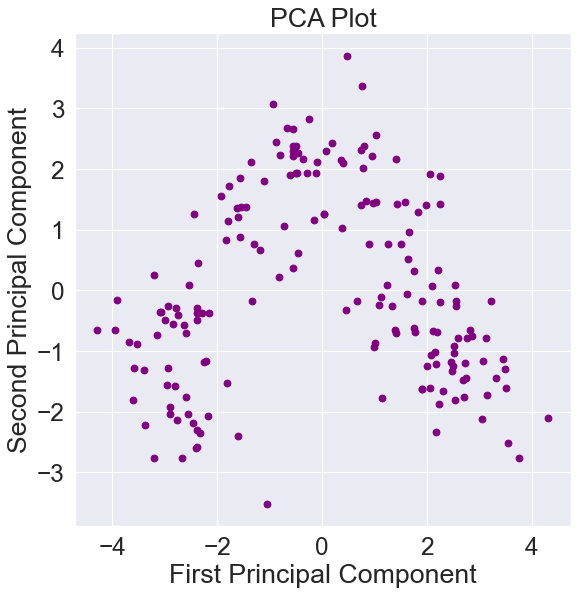

In [191]:
def plot_pca(pca_data):
    """
    Plot PCA components.

    Parameters:
    - pca_data (DataFrame): PCA transformed data with two components
    """
    plt.figure(figsize=(8, 8), dpi=80)
    plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1],color='purple')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Plot')
    plt.show()

plot_pca(pca_data)


 This plot doesn't provide much useful information at the moment, as there are no unique colours used to signify distinct groups. Next I will use Elbow method and use k-Means to cluster these data points into groups around its nearest centroid.

## Elbow Plot:

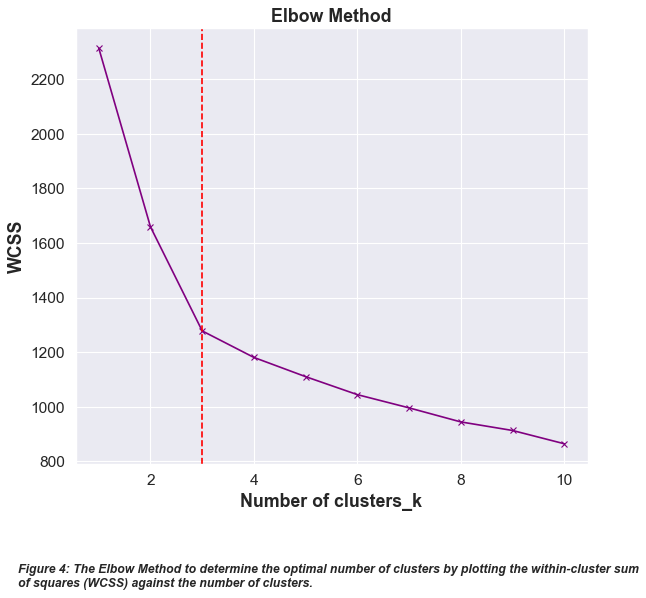

In [192]:
import numpy as np

def plot_elbow_method(data_scaled, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.

    Parameters:
    - data_scaled (DataFrame): Scaled input data
    - max_clusters (int): Maximum number of clusters to evaluate (default: 10)
    """
    cs = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data_scaled)
        cs.append(kmeans.inertia_)

    plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(range(1, max_clusters + 1), cs, color='purple', marker='x') 
    plt.title('Elbow Method', fontsize=16, fontweight='bold')
    plt.xlabel('Number of clusters_k', fontsize=16, fontweight='bold')
    plt.ylabel('WCSS', fontsize=16, fontweight='bold')

    # Added description
    plt.figtext(0.01, 0.01,
    'Figure 4: The Elbow Method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.',
    wrap=True, horizontalalignment='left', fontsize=11, fontweight='bold', fontstyle = 'italic')

    # Added a dashed line on the third point
    plt.axvline(x=3, linestyle='--', color='red')

    # Adjust plot to move description to the left side
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9)

    # Tick size
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

# Example usage
plot_elbow_method(data_scaled)


## K-Means:

In [193]:
def apply_kmeans(data_scaled):
    """
    Apply KMeans clustering to the scaled data.

    Parameters:
    - data_scaled (DataFrame): Scaled input data

    Returns:
    - kmeans: Fitted KMeans model
    - clusters (array): Cluster labels for each data point
    - centroids (array): Coordinates of cluster centroids
    - centroids_pca (array): PCA-transformed coordinates of cluster centroids
    """
    kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca.transform(centroids)
    return kmeans, clusters, centroids, centroids_pca

kmeans, clusters, centroids, centroids_pca = apply_kmeans(data_scaled)


/Users/shamaparveen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


This function takes scaled input data, applies KMeans clustering with 3 clusters, and returns the fitted KMeans model, cluster labels for each data point, coordinates of cluster centroids, and PCA-transformed coordinates of cluster centroids.

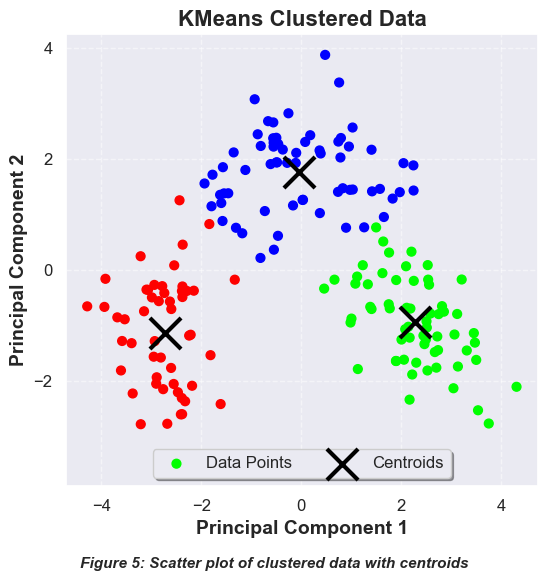

In [194]:
def plot_clustered_data(pca_data, clusters, centroids_pca):
    """
    Plot clustered data with centroids.

    Parameters:
    - pca_data (DataFrame): PCA transformed data with two components
    - clusters (array-like): Cluster labels assigned to each data point
    - centroids_pca (array-like): Coordinates of centroids in PCA space
    """
    # Plotting PCA in colour
    plt.figure(figsize=(6, 6))
    plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=clusters, cmap="brg", s=40, label='Data Points')
    plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="x", s=500, linewidths=3, color="black", label='Centroids')
    plt.title('KMeans Clustered Data', fontsize=16, fontweight='bold')  # Bold title
    plt.xlabel('Principal Component 1', fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel('Principal Component 2', fontsize=14, fontweight='bold')  # Bold y-axis label
    plt.xticks(fontsize=12)  # Reduce x-axis tick size
    plt.yticks(fontsize=12)  # Reduce y-axis tick size
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 0.1), fancybox=True, shadow=True, ncol=2)  # Add legend
    plt.figtext(0.5, 0.01, 'Figure 5: Scatter plot of clustered data with centroids', wrap=True, horizontalalignment='center', fontsize=11, fontweight='bold', style='italic')  # Add description below the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_clustered_data(pca_data, clusters, centroids_pca)


## Linear Regression:

In [195]:
def fit_linear_regression_model(data,x_data,y_data):
    """
    Fits a linear regression model.

    Parameters:
    - x (array-like): Input feature data (Total_Phenols)
    - y (array-like): Target feature data (Flavanoids)
    - model: Fitted linear regression model

    Returns:
    - model: Fitted linear regression model
    """
    # Extracting the features
    x = x_data.values.reshape(-1, 1)
    y = y_data.values

    # Perform linear regression
    model = LinearRegression()
    model.fit(x, y)

    return model

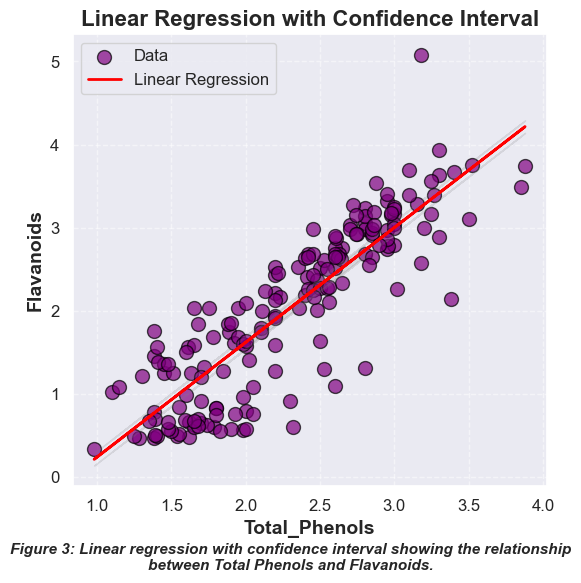

In [196]:
def plot_line_fitting(x, y, model):
    """
    Visualizes the linear regression results.

    Parameters:
    - x (array-like): Input feature data
    - y (array-like): Target feature data
    - model: Fitted linear regression model
    """
    plt.figure(figsize=(6, 6))

    # Convert x to a NumPy array and reshape
    x_np = np.array(x).reshape(-1, 1)

    # Predictions from the model
    y_pred = model.predict(x_np)

    # Calculate standard error
    mse = mean_squared_error(y, y_pred)
    se = np.sqrt(mse / (len(y) - 2))

    # Calculate t-statistic for 95% confidence interval
    t_value = t.ppf(0.975, len(y) - 2)
    confidence_interval = t_value * se

    # Plot data points
    plt.scatter(x, y, label='Data', s=100, color='purple', alpha=0.7, edgecolor='black')

    # Plot regression line
    plt.plot(x, y_pred, color='red', label='Linear Regression', linewidth=2)

    # Plot confidence interval
    plt.fill_between(x, y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.2)

    # Styling plot
    plt.title("Linear Regression with Confidence Interval", fontsize=16, fontweight='bold') 
    plt.xlabel("Total_Phenols", fontsize=14, fontweight='bold')  
    plt.ylabel("Flavanoids", fontsize=14, fontweight='bold')  
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # Add description line below the plot
    plt.figtext(0.5, 0.01, 'Figure 3: Linear regression with confidence interval showing the relationship between Total Phenols and Flavanoids.',
                wrap=True, horizontalalignment='center', fontsize=11, fontweight='bold', fontstyle = 'italic')

    plt.show()

# Example usage
x_data = data['Total_Phenols']
y_data = data['Flavanoids']
linear_model = fit_linear_regression_model(data, x_data, y_data)
plot_line_fitting(x_data, y_data, linear_model)
